This notebook will be used for developing pictures for the result

In [40]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

use the data from simulator to come up with plots

In [19]:
#read in the simulated data
df1 = pd.read_csv("country_k.csv")
df2 = pd.read_csv("aT20200N10.csv")
df1.drop(df1.tail(1).index,inplace=True)
df2=df2.loc[ :,:"country_2"]
df2= df2.head(2000)
result1 = pd.concat([df1["country_1"], df2["country_1"]], axis=1)
result1.columns=["Capital", "Productivity"]
result1["Country"]="country 1"
#result2 = pd.concat([df1["country_2"], df2["country_2"]], axis=1)
#result2.columns=["Capital", "Productivity"]
#result2["Country"]="country 2"
#result= pd.concat([result1, result2])

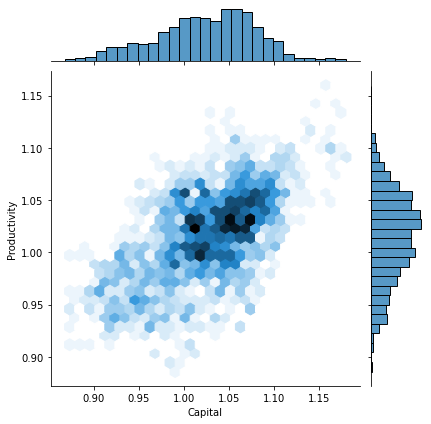

In [68]:
Fig1= sns.jointplot("Capital", "Productivity",data=result1, kind='hex')

In [1]:
# import custom functions
from tools.auxiliary import*
from tools.GSSA_1_agent import*
from tools.GSSA_countries import*
import pandas as pd
result1, result2, result3 = Result_agent(cache=True)

In [4]:
result1.iloc[2:5,3]=0
result1.iloc[8:10,3]=0

In [6]:
result3.iloc[4,3]=0
result3.iloc[9,3]=0

In [ ]:
def LS_Figure(x, y):
    '''
    Plots the comparision between LS methods.
    -----
    Arguments:
        x(pandas Dataframe): Result1 from the function Result_agent().
        y(pandas Dataframe): Result2 from the function Result_agent().
    '''
    # Get the results
    result1 = x
    result2 = y
    fig, axes = plt.subplots(2, 3, figsize=(14, 10))
    plt.subplots_adjust(wspace=0.5)
    fig.suptitle("Figure: LS methods comparision", fontsize=16)

    # Plotting
    g = sns.barplot(x="Polynomial Degree", y="Total Time", hue="Method", data=result1, ax=axes[0, 0])
    show_values_on_bars(axes[0, 0])
    axes[0, 0].legend().remove()
    g.set(ylabel="Total Time(sec)")
    g = sns.barplot(x="Polynomial Degree", y="Mean Error", hue="Method", data=result1, ax=axes[0, 1])
    g.invert_yaxis()
    axes[0, 1].legend().remove()
    g.set(ylabel="Mean Error($\log_{10}$)")
    g = sns.barplot(x="Polynomial Degree", y="Max Error", hue="Method", data=result1, ax=axes[0, 2])
    g.invert_yaxis()
    axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    g.set(ylabel="Maximum Error($\log_{10}$)")
    g = sns.barplot(x="Polynomial Degree", y="Total Time", hue="Method", data=result2, ax=axes[1, 0])
    show_values_on_bars(axes[1, 0])
    axes[1, 0].legend().remove()
    g.set(ylabel="Total Time(sec)")
    g = sns.barplot(x="Polynomial Degree", y="Mean Error", hue="Method", data=result2, ax=axes[1, 1])
    g.invert_yaxis()
    axes[1, 1].legend().remove()
    g.set(ylabel="Mean Error($\log_{10}$)")
    g = sns.barplot(x="Polynomial Degree", y="Max Error", hue="Method", data=result2, ax=axes[1, 2])
    g.invert_yaxis()
    g.set(ylabel="Maximum Error($\log_{10}$)")
    axes[1, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    return